In [109]:
import warnings 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use(style='ggplot')
%matplotlib inline

In [2]:
train = pd.read_csv('dataset/train-data.csv')
test = pd.read_csv('dataset/test-data.csv')
print(train.shape)
print(train.info())
print(test.shape)
print(test.info())

(6019, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB
None
(1234, 13)
<class 'pandas.core.frame.DataFram

In [3]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
print(train.shape, test.shape)
train.drop('New_Price', axis=1, inplace=True)
test.drop('New_Price', axis=1, inplace=True)
print(train.shape, test.shape)

(6019, 14) (1234, 13)
(6019, 13) (1234, 12)


# Data Cleaning and Feature Engineering

In [6]:
print(train.isnull().sum())
print("------------------------")
print(test.isnull().sum())

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
------------------------
Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


## Unnamed

In [7]:
print(train['Unnamed: 0'].value_counts())

0       1
4009    1
4018    1
4017    1
4016    1
       ..
2004    1
2003    1
2002    1
2001    1
6018    1
Name: Unnamed: 0, Length: 6019, dtype: int64


In [8]:
unnamed_train = list(train['Unnamed: 0'].unique())
unnamed_test = list(test['Unnamed: 0'].unique())
for i in unnamed_test:
    if i not in unnamed_train:
        print(i)

## Name

In [9]:
print(train['Name'].value_counts())
print(train['Unnamed: 0'].value_counts())

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64
0       1
4009    1
4018    1
4017    1
4016    1
       ..
2004    1
2003    1
2002    1
2001    1
6018    1
Name: Unnamed: 0, Length: 6019, dtype: int64


In [10]:
print(test['Name'].value_counts())

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 768, dtype: int64


In [11]:
print(test['Name'].value_counts())

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 768, dtype: int64


In [12]:
car_names_train = list(train['Name'].unique())
car_names_test = list(test['Name'].unique())
for i in car_names_test:
    if i not in car_names_train:
        print(i)

Toyota Innova Crysta Touring Sport 2.4 MT
Maruti Swift AMT ZXI
Skoda Laura 1.8 TSI Ambition
Honda Civic 2010-2013 1.8 S MT Inspire
Toyota Etios Liva 1.4 VXD
Maruti Celerio X VXI Option
Chevrolet Sail Hatchback 1.2
Mahindra Scorpio VLX Special Edition BS-IV
Tata Tiago AMT 1.2 Revotron XTA
Maruti Ciaz VXi
Nissan Teana XL
Tata Manza Club Class Safire90 LX
Ford Fiesta Classic 1.6 SXI Duratec
Mercedes-Benz B Class B180 Sports
Nissan Micra XL CVT
Tata Indica V2 DiCOR DLG BS-III
Tata Indica Vista Quadrajet LX
Audi Q3 30 TDI S Edition
Honda BRV i-DTEC V MT
BMW 3 Series GT 320d Sport Line
Toyota Etios Liva VD
Datsun GO T Petrol
Maruti A-Star Zxi
Mahindra KUV 100 mFALCON G80 K4 5str
Ford Fiesta 1.4 SXI Duratorq
Fiat Avventura FIRE Dynamic
Honda CR-V Diesel
Mahindra Xylo E9
Hyundai Creta 1.6 SX Automatic
Honda Mobilio V i VTEC
Tata Indica Vista Aqua TDI BSIII
Skoda Laura 1.9 TDI MT Elegance
Honda City ZX VTEC Plus
BMW 7 Series 730Ld DPE Signature
Hindustan Motors Contessa 2.0 DSL
Fiat Linea Dynam

We can not handle all of these values, we have to drop the name column

In [13]:
print(train.shape, test.shape)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
print(train.shape, test.shape)

(6019, 13) (1234, 12)
(6019, 12) (1234, 11)


## Location

In [14]:
train['Location'][:20]

0         Mumbai
1           Pune
2        Chennai
3        Chennai
4     Coimbatore
5      Hyderabad
6         Jaipur
7         Mumbai
8           Pune
9        Chennai
10         Kochi
11       Kolkata
12        Jaipur
13         Delhi
14          Pune
15         Delhi
16         Kochi
17        Jaipur
18         Kochi
19     Bangalore
Name: Location, dtype: object

In [15]:
train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [16]:
test['Location'].value_counts()

Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64

## Kilometers_Driven

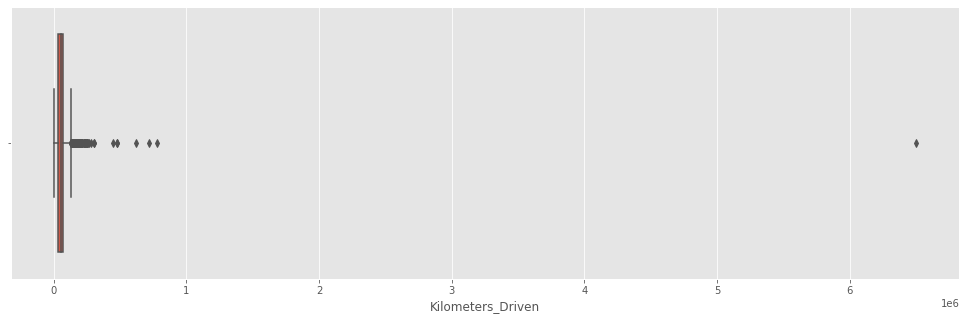

In [17]:
plt.figure(figsize=(17, 5))
sns.boxplot(train['Kilometers_Driven'])
plt.show()

In [18]:
temp2 = test[test['Kilometers_Driven'] > 400000]
temp2

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats


In [19]:
print(train.shape)
temp = train[train['Kilometers_Driven'] > 400000].index
train.drop(temp, axis=0, inplace=True)
print(train.shape)

(6019, 12)
(6012, 12)


## Fuel Type

In [20]:
train['Fuel_Type'][:20]

0        CNG
1     Diesel
2     Petrol
3     Diesel
4     Diesel
5        LPG
6     Diesel
7     Diesel
8     Diesel
9     Diesel
10    Petrol
11    Petrol
12    Diesel
13    Diesel
14    Diesel
15    Diesel
16    Diesel
17    Diesel
18    Diesel
19    Diesel
Name: Fuel_Type, dtype: object

In [21]:
train['Fuel_Type'].value_counts()

Diesel      3201
Petrol      2743
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [22]:
test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

## Transmission

In [23]:
train['Transmission'][:20]

0        Manual
1        Manual
2        Manual
3        Manual
4     Automatic
5        Manual
6        Manual
7     Automatic
8        Manual
9        Manual
10       Manual
11    Automatic
12       Manual
13    Automatic
14    Automatic
15       Manual
16       Manual
17       Manual
18       Manual
19    Automatic
Name: Transmission, dtype: object

In [24]:
train['Transmission'].value_counts()

Manual       4295
Automatic    1717
Name: Transmission, dtype: int64

In [25]:
test['Transmission'].value_counts()

Manual       905
Automatic    329
Name: Transmission, dtype: int64

## Owner_Type

In [26]:
train['Owner_Type'][:20]

0      First
1      First
2      First
3      First
4     Second
5      First
6      First
7      First
8      First
9     Second
10     First
11     First
12     First
13     First
14    Second
15     First
16     First
17     First
18     First
19     First
Name: Owner_Type, dtype: object

In [27]:
train['Owner_Type'].value_counts()

First             4922
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [28]:
test['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

## Mileage

In [29]:
train['Mileage'][:20]

0     26.6 km/kg
1     19.67 kmpl
2      18.2 kmpl
3     20.77 kmpl
4      15.2 kmpl
5     21.1 km/kg
6     23.08 kmpl
7     11.36 kmpl
8     20.54 kmpl
9      22.3 kmpl
10    21.56 kmpl
11     16.8 kmpl
12     25.2 kmpl
13     12.7 kmpl
14      0.0 kmpl
15     13.5 kmpl
16     25.8 kmpl
17     28.4 kmpl
18    20.45 kmpl
19    14.84 kmpl
Name: Mileage, dtype: object

- km/kg: Kilometers per Kilogram
- kmpl: Kilometers per Litre

In [30]:
train['Mileage'].value_counts(dropna=False)

17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     87
21.1 kmpl      86
             ... 
14.57 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.09 kmpl      1
17.24 kmpl      1
Name: Mileage, Length: 443, dtype: int64

In [31]:
# Null Values
train['Mileage'] = train['Mileage'].fillna('17.0 kmpl')

We can make 2 new columns, one for the value and one for the measurement to handle the mile age column, then we drop it.

In [32]:
train['Mileage'][0].split()[0], train['Mileage'][0].split()[1]

('26.6', 'km/kg')

In [33]:
mile_age_val = pd.DataFrame(columns=['Mileage_value'])
mile_age_measure = pd.DataFrame(columns=['Mileage_measure'])
train = pd.concat([train, mile_age_val, mile_age_measure], axis=1)
test = pd.concat([test, mile_age_val, mile_age_measure], axis=1)

for i in train.index:
    value = train['Mileage'][i].split()[0]
    measure = train['Mileage'][i].split()[1]
    train['Mileage_value'][i] = value
    train['Mileage_measure'][i] = measure
    
for i in test.index:
    value = test['Mileage'][i].split()[0]
    measure = test['Mileage'][i].split()[1]
    test['Mileage_value'][i] = value
    test['Mileage_measure'][i] = measure
    
train.drop('Mileage', axis=1, inplace=True)
test.drop('Mileage', axis=1, inplace=True)

## Engine

In [34]:
train['Engine'][:20]

0      998 CC
1     1582 CC
2     1199 CC
3     1248 CC
4     1968 CC
5      814 CC
6     1461 CC
7     2755 CC
8     1598 CC
9     1248 CC
10    1462 CC
11    1497 CC
12    1248 CC
13    2179 CC
14    2179 CC
15    2477 CC
16    1498 CC
17    1248 CC
18    1461 CC
19    2143 CC
Name: Engine, dtype: object

In [35]:
train['Engine'].value_counts()

1197 CC    604
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
2147 CC      1
2495 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 146, dtype: int64

In [36]:
test['Engine'].value_counts()

1197 CC    126
1248 CC     98
1498 CC     66
1198 CC     54
998 CC      50
          ... 
1948 CC      1
1299 CC      1
5998 CC      1
2362 CC      1
1047 CC      1
Name: Engine, Length: 104, dtype: int64

In [37]:
# Null Values
train['Engine'] = train['Engine'].fillna('1197 CC')
test['Engine'] = test['Engine'].fillna('1197 CC')

We are gonna do the same we did with Mileage

In [38]:
train['Engine'][0].split()[0], train['Engine'][0].split()[1]

('998', 'CC')

In [39]:
engine_val = pd.DataFrame(columns=['Engine_value'])
engine_measure = pd.DataFrame(columns=['Engine_measure'])
train = pd.concat([train, engine_val, engine_measure], axis=1)
test = pd.concat([test, engine_val, engine_measure], axis=1)

for i in train.index:
    value = train['Engine'][i].split()[0]
    measure = train['Engine'][i].split()[1]
    train['Engine_value'][i] = value
    train['Engine_measure'][i] = measure
        
for i in test.index:
    value = test['Engine'][i].split()[0]
    measure = test['Engine'][i].split()[1]
    test['Engine_value'][i] = value
    test['Engine_measure'][i] = measure
    
train.drop('Engine', axis=1, inplace=True)
test.drop('Engine', axis=1, inplace=True)

In [40]:
train['Engine_measure'].value_counts()

CC    6012
Name: Engine_measure, dtype: int64

In [41]:
train.drop('Engine_measure', axis=1, inplace=True)
test.drop('Engine_measure', axis=1, inplace=True)

In [42]:
train.shape, test.shape

((6012, 13), (1234, 12))

## Power

In [43]:
train['Power'][:20]

0      58.16 bhp
1      126.2 bhp
2       88.7 bhp
3      88.76 bhp
4      140.8 bhp
5       55.2 bhp
6       63.1 bhp
7      171.5 bhp
8      103.6 bhp
9         74 bhp
10    103.25 bhp
11     116.3 bhp
12        74 bhp
13     187.7 bhp
14       115 bhp
15    175.56 bhp
16      98.6 bhp
17        74 bhp
18      83.8 bhp
19    167.62 bhp
Name: Power, dtype: object

In [44]:
train['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      110
             ... 
340 bhp         1
80.9 bhp        1
68.1 bhp        1
301.73 bhp      1
181.04 bhp      1
Name: Power, Length: 372, dtype: int64

In [45]:
test['Power'].value_counts()

74 bhp        45
98.6 bhp      35
73.9 bhp      27
82 bhp        23
null bhp      22
              ..
97.7 bhp       1
161 bhp        1
167.7 bhp      1
245.41 bhp     1
92.7 bhp       1
Name: Power, Length: 249, dtype: int64

In [46]:
train['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [47]:
# Null Values
train['Power'] = train['Power'].fillna('74 bhp')
test['Power'] = test['Power'].fillna('74 bhp')

In [48]:
power_val = pd.DataFrame(columns=['Power_value'])
power_measure = pd.DataFrame(columns=['Power_measure'])
train = pd.concat([train, power_val, power_measure], axis=1)
test = pd.concat([test, power_val, power_measure], axis=1)

for i in train.index:
    value = train['Power'][i].split()[0]
    measure = train['Power'][i].split()[1]
    train['Power_value'][i] = value
    train['Power_measure'][i] = measure
        
for i in test.index:
    value = test['Power'][i].split()[0]
    measure = test['Power'][i].split()[1]
    test['Power_value'][i] = value
    test['Power_measure'][i] = measure
    
train.drop('Power', axis=1, inplace=True)
test.drop('Power', axis=1, inplace=True)

In [49]:
train['Power_measure'].value_counts()

bhp    6012
Name: Power_measure, dtype: int64

In [50]:
t = train[train['Power_value'] == 'null']
t['Power_value'] = '74'
train[train['Power_value'] == 'null'] = t
t = test[test['Power_value'] == 'null']
t['Power_value'] = '74'
test[test['Power_value'] == 'null'] = t

In [51]:
train.drop('Power_measure', axis=1, inplace=True)
test.drop('Power_measure', axis=1, inplace=True)

## Seats

In [52]:
train['Seats'][:20]

0     5.0
1     5.0
2     5.0
3     7.0
4     5.0
5     5.0
6     5.0
7     8.0
8     5.0
9     5.0
10    5.0
11    5.0
12    5.0
13    5.0
14    5.0
15    7.0
16    5.0
17    5.0
18    5.0
19    5.0
Name: Seats, dtype: float64

In [53]:
train['Seats'].value_counts()

5.0     5007
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [54]:
test['Seats'].value_counts()

5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [55]:
# Null values
train['Seats'] = train['Seats'].fillna(5.0)
test['Seats'] = test['Seats'].fillna(5.0)

# EDA

## Unnamed: 0

In [56]:
print(len(train['Unnamed: 0'].value_counts()))

6012


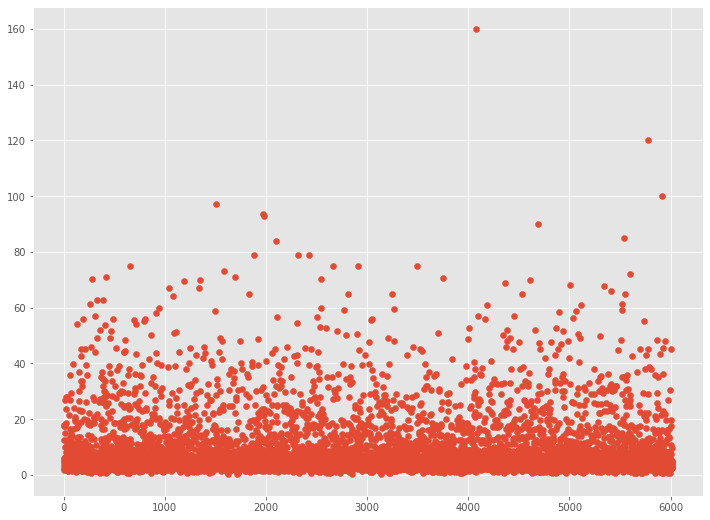

In [57]:
plt.figure(figsize=(12, 9))
plt.scatter(train['Unnamed: 0'], train['Price'])

There is no clear pattern in this feautre, i guess it's gonna be misleading, we gotta drop it.

In [58]:
print(train.shape, test.shape)
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
print(train.shape, test.shape)

(6012, 13) (1234, 12)
(6012, 12) (1234, 11)


## Location

<Figure size 864x648 with 0 Axes>

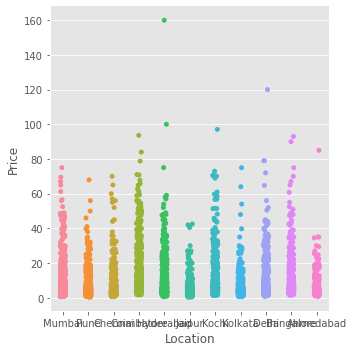

In [59]:
plt.figure(figsize=(12, 9))
sns.catplot('Location', 'Price', data=train)

<AxesSubplot:xlabel='Location', ylabel='Price'>

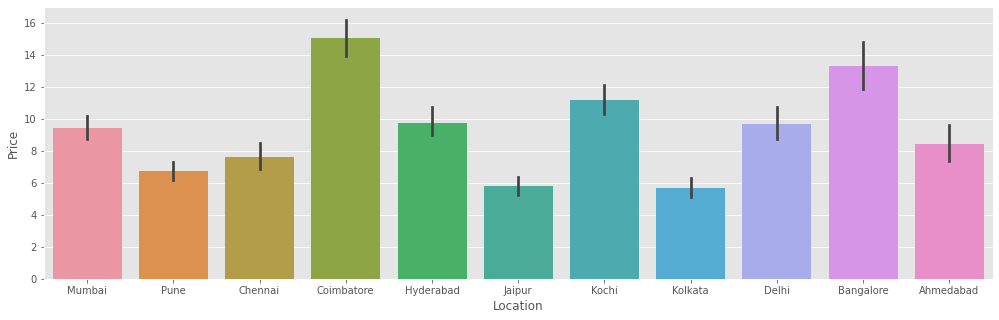

In [60]:
plt.figure(figsize=(17, 5))
sns.barplot('Location', 'Price', data=train)

## Year

<Figure size 864x648 with 0 Axes>

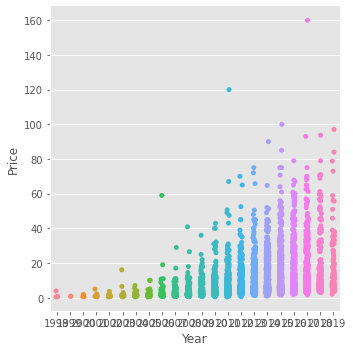

In [61]:
plt.figure(figsize=(12, 9))
sns.catplot('Year', 'Price', data=train)

<AxesSubplot:xlabel='Year', ylabel='Price'>

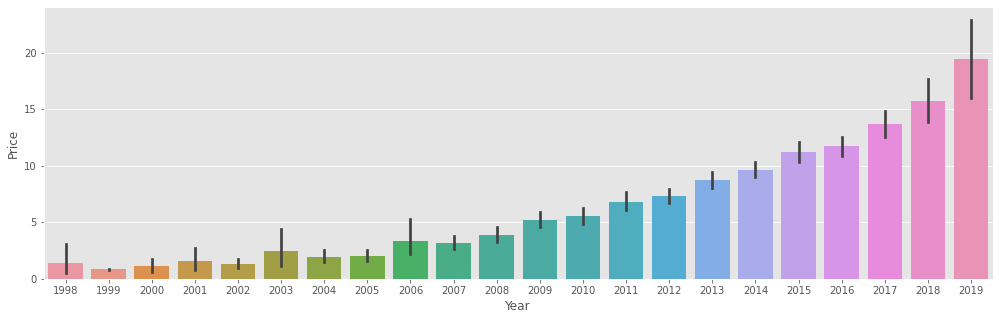

In [62]:
plt.figure(figsize=(17, 5))
sns.barplot('Year', 'Price', data=train)

<AxesSubplot:xlabel='Year', ylabel='count'>

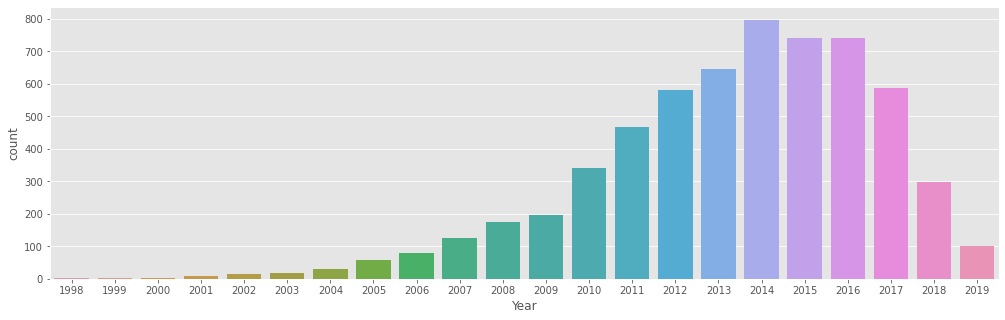

In [63]:
plt.figure(figsize=(17, 5))
sns.countplot('Year', data=train)

<AxesSubplot:xlabel='Year', ylabel='count'>

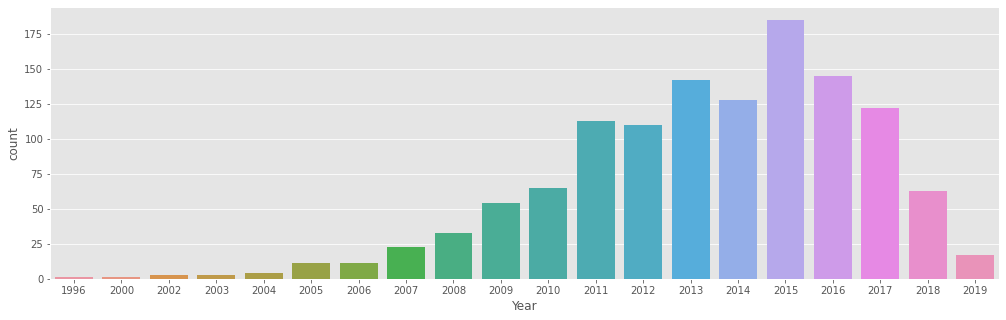

In [64]:
plt.figure(figsize=(17, 5))
sns.countplot('Year', data=test)

I guess it would be reasonable to generate a new feature like 'is_after_2014'

In [65]:
is_after_2014 = pd.DataFrame(columns=['is_after_2014'])
train = pd.concat([train, is_after_2014], axis=1)
test = pd.concat([test, is_after_2014], axis=1)

for i in train.index:
    val = train['Year'][i]
    if val > 2014:
        train['is_after_2014'][i] = 1
    else:
        train['is_after_2014'][i] = 0
        
for i in test.index:
    val = test['Year'][i]
    if val > 2014:
        test['is_after_2014'][i] = 1
    else:
        test['is_after_2014'][i] = 0

## Kilometers_Driven

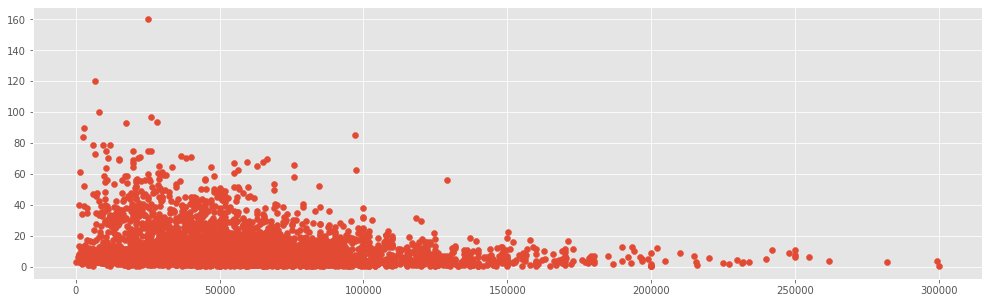

In [66]:
plt.figure(figsize=(17, 5))
plt.scatter(train['Kilometers_Driven'], train['Price'])

Generating new feature 'is_kilometers_driven_less_80k' would be useful

In [67]:
less_80k = pd.DataFrame(columns=['is_kilometers_driven_less_80k'])
train = pd.concat([train, less_80k])
test = pd.concat([test, less_80k])

for i in train.index:
    value = train['Kilometers_Driven'][i]
    if value < 80000:
        train['is_kilometers_driven_less_80k'][i] = 1
    else:
        train['is_kilometers_driven_less_80k'][i] = 0
        
for i in test.index:
    value = test['Kilometers_Driven'][i]
    if value < 80000:
        test['is_kilometers_driven_less_80k'][i] = 1
    else:
        test['is_kilometers_driven_less_80k'][i] = 0

## Fuel_Type

<Figure size 720x504 with 0 Axes>

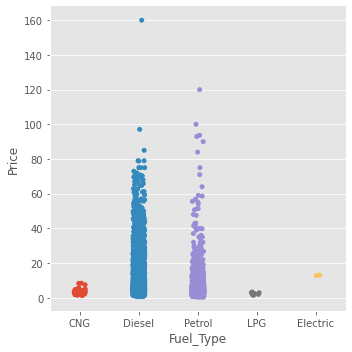

In [68]:
plt.figure(figsize=(10, 7))
sns.catplot('Fuel_Type', 'Price', data=train)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

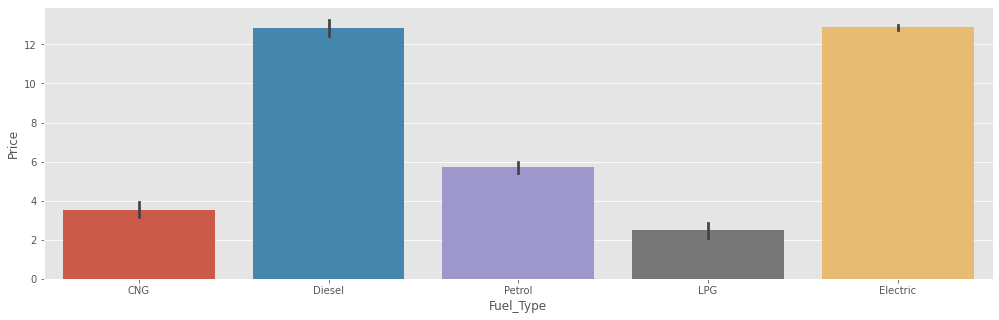

In [69]:
plt.figure(figsize=(17, 5))
sns.barplot('Fuel_Type', 'Price', data=train)

In [70]:
test['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

- We are gonna generate feature 'is_diesel'
- Generating features like 'is_electric' is not gonna be useful, cuz there is not electric cars in test set

In [71]:
is_diesel = pd.DataFrame(columns=['is_diesel'])
train = pd.concat([train, is_diesel], axis=1)
test = pd.concat([test, is_diesel], axis=1)

for i in train.index:
    value = train['Fuel_Type'][i]
    if value == 'Diesel':
        train['is_diesel'][i] = 1
    else:
        train['is_diesel'][i] = 0

for i in test.index:
    value = test['Fuel_Type'][i]
    if value == 'Diesel':
        test['is_diesel'][i] = 1
    else:
        test['is_diesel'][i] = 0

## Transmission

<Figure size 720x504 with 0 Axes>

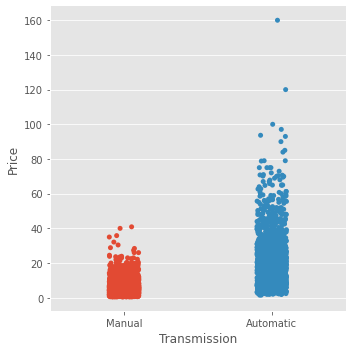

In [72]:
plt.figure(figsize=(10, 7))
sns.catplot('Transmission', 'Price', data=train)

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

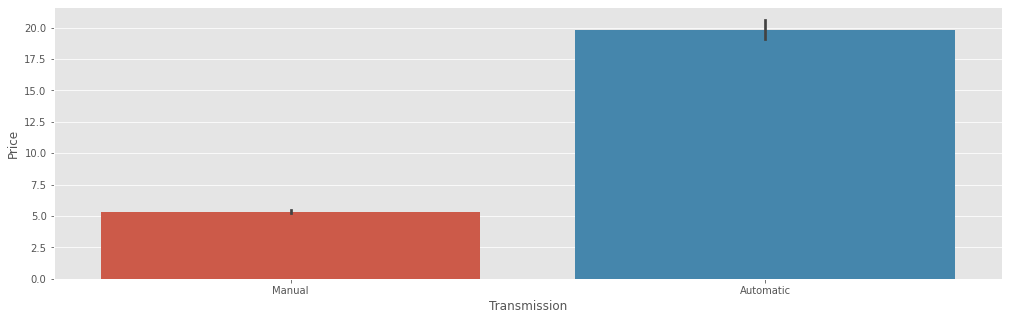

In [73]:
plt.figure(figsize=(17, 5))
sns.barplot('Transmission', 'Price', data=train)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

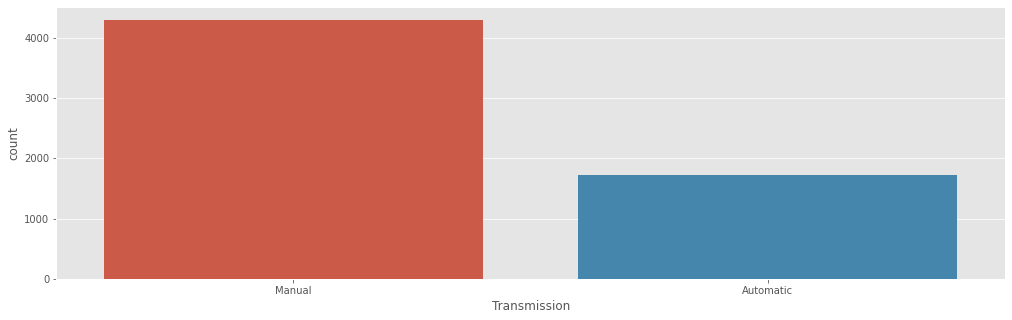

In [74]:
plt.figure(figsize=(17, 5))
sns.countplot('Transmission', data=train)

Generating 'is_automatic' would be great!

In [75]:
is_automatic = pd.DataFrame(columns=['is_automatic'])
train = pd.concat([train, is_automatic], axis=1)
test = pd.concat([test, is_automatic], axis=1)

for i in train.index:
    value = train['Transmission'][i]
    if value == 'Automatic':
        train['is_automatic'][i] = 1
    else:
        train['is_automatic'][i] = 0

for i in test.index:
    value = test['Transmission'][i]
    if value == 'Automatic':
        test['is_automatic'][i] = 1
    else:
        test['is_automatic'][i] = 0

## Owner_Type

<Figure size 720x504 with 0 Axes>

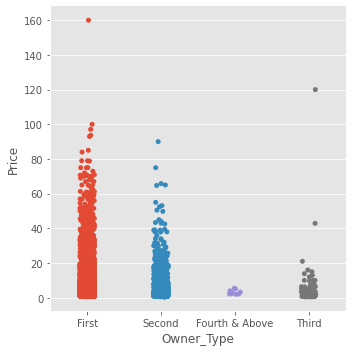

In [76]:
plt.figure(figsize=(10, 7))
sns.catplot('Owner_Type', 'Price', data=train)

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

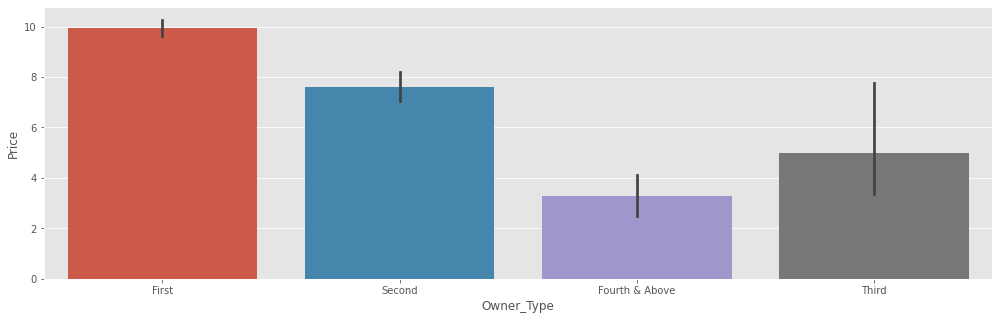

In [77]:
plt.figure(figsize=(17, 5))
sns.barplot('Owner_Type', 'Price', data=train)

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

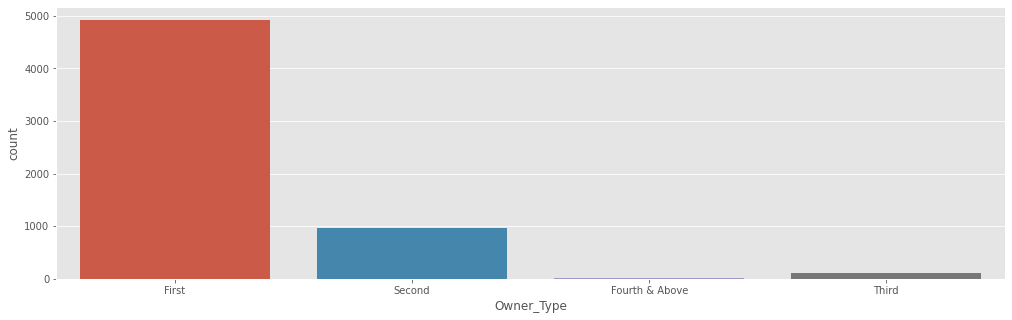

In [78]:
plt.figure(figsize=(17, 5))
sns.countplot('Owner_Type', data=train)

I guess generating feature here is not gonna be that useful

## Seats

In [79]:
print(train['Seats'].value_counts())
print(test['Seats'].value_counts())

5.0     5049
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64
5.0     1044
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64


In [80]:
print(train.shape)
zero_seat = train[train['Seats'] == 0].index
train.drop(zero_seat, axis=0, inplace=True)
print(train.shape)

(6012, 16)
(6011, 16)


<Figure size 576x432 with 0 Axes>

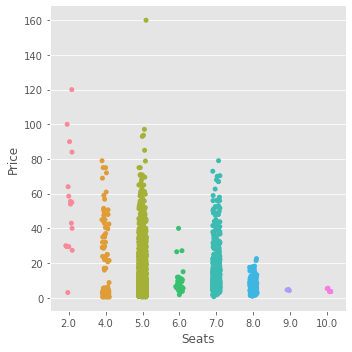

In [81]:
plt.figure(figsize=(8, 6))
sns.catplot('Seats', 'Price', data=train)

<AxesSubplot:xlabel='Seats', ylabel='Price'>

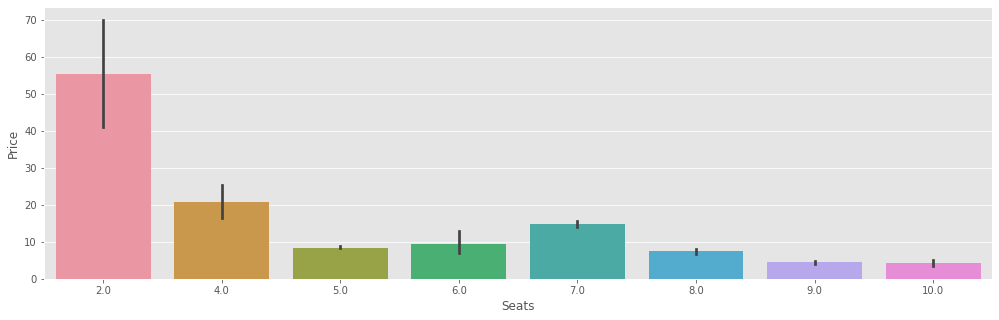

In [82]:
plt.figure(figsize=(17, 5))
sns.barplot('Seats', 'Price', data=train)

<AxesSubplot:xlabel='Seats', ylabel='count'>

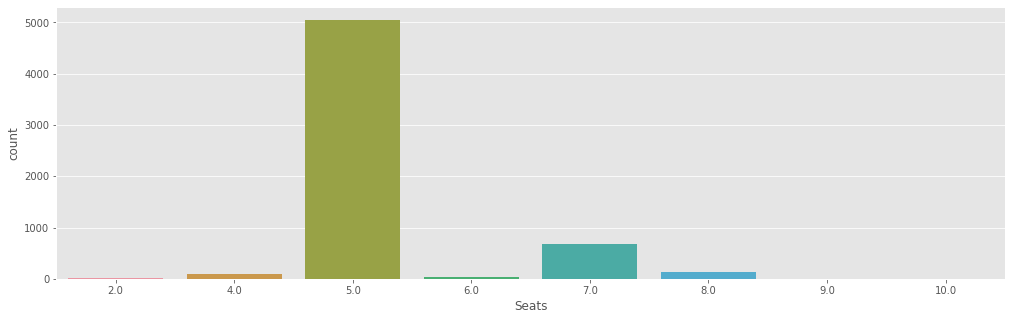

In [83]:
plt.figure(figsize=(17, 5))
sns.countplot('Seats', data=train)

Generating 'is_2_seats' feature

In [84]:
is_2_seats = pd.DataFrame(columns=['is_2_seats'])
train = pd.concat([train, is_2_seats], axis=1)
test = pd.concat([test, is_2_seats], axis=1)

for i in train.index:
    value = train['Seats'][i]
    if value == 2:
        train['is_2_seats'][i] = 1
    else:
        train['is_2_seats'][i] = 0
        
for i in test.index:
    value = test['Seats'][i]
    if value == 2:
        test['is_2_seats'][i] = 1
    else:
        test['is_2_seats'][i] = 0

In [85]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_value,Mileage_measure,Engine_value,Power_value,is_after_2014,is_kilometers_driven_less_80k,is_diesel,is_automatic,is_2_seats
0,Mumbai,2010.0,72000.0,CNG,Manual,First,5.0,1.75,26.6,km/kg,998,58.16,0,1,0,0,0
1,Pune,2015.0,41000.0,Diesel,Manual,First,5.0,12.50,19.67,kmpl,1582,126.2,1,1,1,0,0
2,Chennai,2011.0,46000.0,Petrol,Manual,First,5.0,4.50,18.2,kmpl,1199,88.7,0,1,0,0,0
3,Chennai,2012.0,87000.0,Diesel,Manual,First,7.0,6.00,20.77,kmpl,1248,88.76,0,0,1,0,0
4,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,5.0,17.74,15.2,kmpl,1968,140.8,0,1,1,1,0


# Encoding Categorical Features

In [86]:
for i in ['is_after_2014', 'is_kilometers_driven_less_80k', 
          'is_diesel', 'is_automatic', 'is_2_seats', 
          'Mileage_value', 'Engine_value', 'Power_value']:
    print(i)
    train[i] = train[i].astype('float32')
    test[i] = test[i].astype('float32')

is_after_2014
is_kilometers_driven_less_80k
is_diesel
is_automatic
is_2_seats
Mileage_value
Engine_value
Power_value


In [87]:
print(train.shape, test.shape)
cat = train.select_dtypes(include='object')

for i in cat.columns:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])
    test[i] = le.transform(test[i])
    
print(train.shape, test.shape)

(6011, 17) (1234, 16)
(6011, 17) (1234, 16)


In [88]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_value,Mileage_measure,Engine_value,Power_value,is_after_2014,is_kilometers_driven_less_80k,is_diesel,is_automatic,is_2_seats
0,9,2010.0,72000.0,0,1,0,5.0,1.75,26.600000,0,998.0,58.160000,0.0,1.0,0.0,0.0,0.0
1,10,2015.0,41000.0,1,1,0,5.0,12.50,19.670000,1,1582.0,126.199997,1.0,1.0,1.0,0.0,0.0
2,2,2011.0,46000.0,4,1,0,5.0,4.50,18.200001,1,1199.0,88.699997,0.0,1.0,0.0,0.0,0.0
3,2,2012.0,87000.0,1,1,0,7.0,6.00,20.770000,1,1248.0,88.760002,0.0,0.0,1.0,0.0,0.0
4,3,2013.0,40670.0,1,0,2,5.0,17.74,15.200000,1,1968.0,140.800003,0.0,1.0,1.0,1.0,0.0


# Normalization

In [89]:
train_target = train['Price']
train.drop('Price', axis=1, inplace=True)
means = train.mean()
stds = train.std()
train = (train - means) / stds
test = (test- means) / stds

In [90]:
print(train.shape)
train.head()

(6011, 16)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_value,Mileage_measure,Engine_value,Power_value,is_after_2014,is_kilometers_driven_less_80k,is_diesel,is_automatic,is_2_seats
0,1.142891,-1.026682,0.440469,-1.570056,0.632035,-0.464009,-0.345781,1.846843,-9.490035,-1.033562,-1.010905,-0.834834,0.490270,-1.067219,-0.632035,-0.051657
1,1.481244,0.501948,-0.477719,-0.905576,0.632035,-0.464009,-0.345781,0.334806,0.105356,-0.060477,0.259433,1.197644,0.490270,0.936859,-0.632035,-0.051657
2,-1.225580,-0.720956,-0.329624,1.087863,0.632035,-0.464009,-0.345781,0.014072,0.105356,-0.698647,-0.440709,-0.834834,0.490270,-1.067219,-0.632035,-0.051657
3,-1.225580,-0.415230,0.884753,-0.905576,0.632035,-0.464009,2.141936,0.574812,0.105356,-0.617001,-0.439589,-0.834834,-2.039354,0.936859,-0.632035,-0.051657
4,-0.887227,-0.109504,-0.487493,-0.905576,-1.581928,1.978335,-0.345781,-0.640490,0.105356,0.582692,0.532022,-0.834834,0.490270,0.936859,1.581928,-0.051657


In [91]:
print(test.shape)
test.head()

(1234, 16)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_value,Mileage_measure,Engine_value,Power_value,is_after_2014,is_kilometers_driven_less_80k,is_diesel,is_automatic,is_2_seats
0,-0.548874,0.196222,-0.479822,-1.570056,0.632035,-0.464009,-1.589639,3.081781,-9.490035,-1.033562,-1.010158,-0.834834,0.490270,-1.067219,-0.632035,-0.051657
1,-0.887227,-0.109504,-0.078070,1.087863,0.632035,1.978335,-0.345781,1.432288,0.105356,-1.370142,-1.213666,-0.834834,0.490270,-1.067219,-0.632035,-0.051657
2,1.142891,1.113400,-0.685051,-0.905576,0.632035,-0.464009,2.141936,-0.972134,0.105356,1.290845,0.662715,1.197644,0.490270,0.936859,-0.632035,-0.051657
3,-0.210521,-0.415230,2.424939,-0.905576,0.632035,-0.464009,-0.345781,1.190100,0.105356,-0.423717,-0.715165,-0.834834,-2.039354,0.936859,-0.632035,-0.051657
4,1.142891,0.196222,-0.833146,1.087863,0.632035,-0.464009,-0.345781,0.079528,0.105356,-0.701980,-0.549931,-0.834834,0.490270,-1.067219,-0.632035,-0.051657


# Modelling 

In [92]:
# Split data
X_train, X_dev, y_train, y_dev = train_test_split(train, train_target, test_size=0.15, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(5109, 16)
(5109,)
(902, 16)
(902,)


In [118]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predict training data
y_pred_dt_train = dt.predict(X_train)

# Evaluation training data
print("MSE on Training Set (Decision Tree):", mean_squared_error(y_pred_dt_train, y_train))

# Predict dev data
y_pred_lr_dev = dt.predict(X_dev)

# Evaluation dev data
print("MSE on Dev Set (Decision Tree):", mean_squared_error(y_pred_lr_dev, y_dev))

MSE on Training Set (Decision Tree): 0.00047000717687740556
MSE on Dev Set (Decision Tree): 43.00849830931264


In [120]:
# KNearest Neighbor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Predict training data
y_pred_knn_train = knn.predict(X_train)

# Evaluation training data
print("MSE on Training Set (KNearest Neighbor):", mean_squared_error(y_pred_knn_train, y_train))

# Predict dev data
y_pred_knn_dev = knn.predict(X_dev)

# Evaluation dev data
print("MSE on Dev Set (KNearest Neighbor):", mean_squared_error(y_pred_knn_dev, y_dev))

MSE on Training Set (KNearest Neighbor): 13.583049486788019
MSE on Dev Set (KNearest Neighbor): 19.356030709534373


In [119]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict training data
y_pred_lr_train = lr.predict(X_train)

# Evaluation training data
print("MSE on Training Set (Linear Regression):", mean_squared_error(y_pred_lr_train, y_train))

# Predict dev data
y_pred_lr_dev = lr.predict(X_dev)

# Evaluation dev data
print("MSE on Dev Set (Linear Regression):", mean_squared_error(y_pred_lr_dev, y_dev))

MSE on Training Set (Linear Regression): 36.99277969809926
MSE on Dev Set (Linear Regression): 30.62006177542496


In [113]:
# Random Froest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict training data
y_pred_rf_train = rf.predict(X_train)

# Evaluation training data
print("MSE on Training Set (Random Forest):", mean_squared_error(y_pred_rf_train, y_train))

# Predict dev data
y_pred_rf_dev = rf.predict(X_dev)

# Evaluation dev data
print("MSE on Dev Set (Random Forest):", mean_squared_error(y_pred_rf_dev, y_dev))

MSE on Training Set (Random Forest): 2.1698150454508283
MSE on Dev Set (Random Forest): 11.840227640540006


In [116]:
# Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)

# Predict training data
y_pred_svm_train = svm.predict(X_train)

# Evaluation training data
print("MSE on Training Set (Support Vector Machine):", mean_squared_error(y_pred_svm_train, y_train))

# Predict dev data
y_pred_svm_dev = svm.predict(X_dev)

# Evaluation dev data
print("MSE on Dev Set (Support Vector Machine):", mean_squared_error(y_pred_svm_dev, y_dev))

MSE on Training Set (Support Vector Machine): 31.959844738814294
MSE on Dev Set (Support Vector Machine): 21.203462707559325


In [121]:
import pickle

dt_model = open('decision_tree_model.pkl', 'wb')
pickle.dump(dt, dt_model)
dt_model.close()

knn_model = open('knearest_neighbor_model.pkl', 'wb')
pickle.dump(knn, knn_model)
knn_model.close()

lr_model = open('linear_regression_model.pkl', 'wb')
pickle.dump(lr, lr_model)
lr_model.close()

rf_model = open('random_forest_model.pkl', 'wb')
pickle.dump(rf, rf_model)
rf_model.close()

svm_model = open('support_vector_model.pkl', 'wb')
pickle.dump(svm, svm_model)
svm_model.close()